In [ ]:
!pip install ultralytics

Using shaker custom dataset (roboflow)

In [ ]:
!nvidia-smi

Mon Aug 28 11:02:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    30W /  70W |   1589MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from ultralytics import YOLO

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 100.1ms
Speed: 1.9ms preprocess, 100.1ms inference, 85.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict3


In [ ]:
#Trained model on coco dataset.

%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 97.3ms
Speed: 1.9ms preprocess, 97.3ms inference, 86.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict4


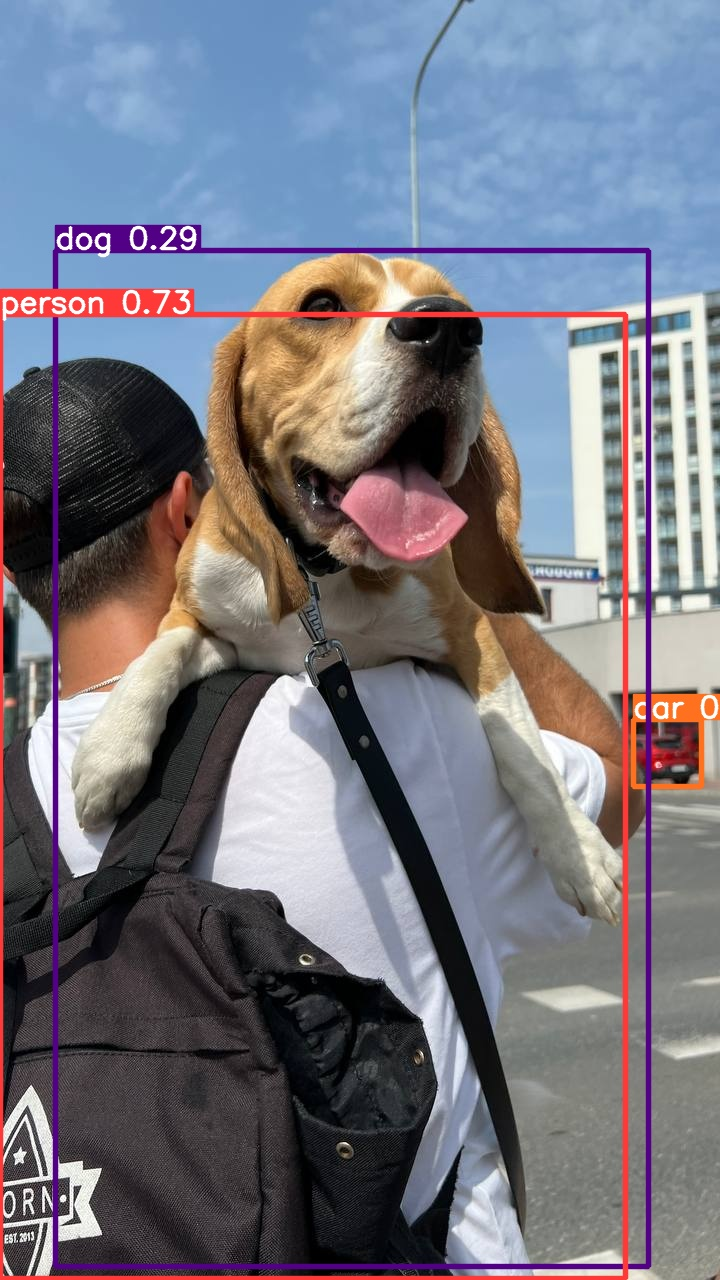

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/predict2/dog.jpeg", width=500, height=500)

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1947],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Use your own custom key")
project = rf.workspace("mashee").project("democustombotel")
dataset = project.version(2).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.164, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Democustombotel-2 in yolov8:: 100%|██████████| 28/28 [00:00<00:00, 4879.53it/s]


In [ ]:
!touch data.yaml

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti

In [ ]:
!ls {HOME}/runs/detect/train8/

args.yaml					     results.png
confusion_matrix_normalized.png			     train_batch0.jpg
confusion_matrix.png				     train_batch15.jpg
events.out.tfevents.1693223288.3bd4ae1dff9f.14560.0  train_batch16.jpg
F1_curve.png					     train_batch17.jpg
labels_correlogram.jpg				     train_batch1.jpg
labels.jpg					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
R_curve.png					     weights
results.csv


/content


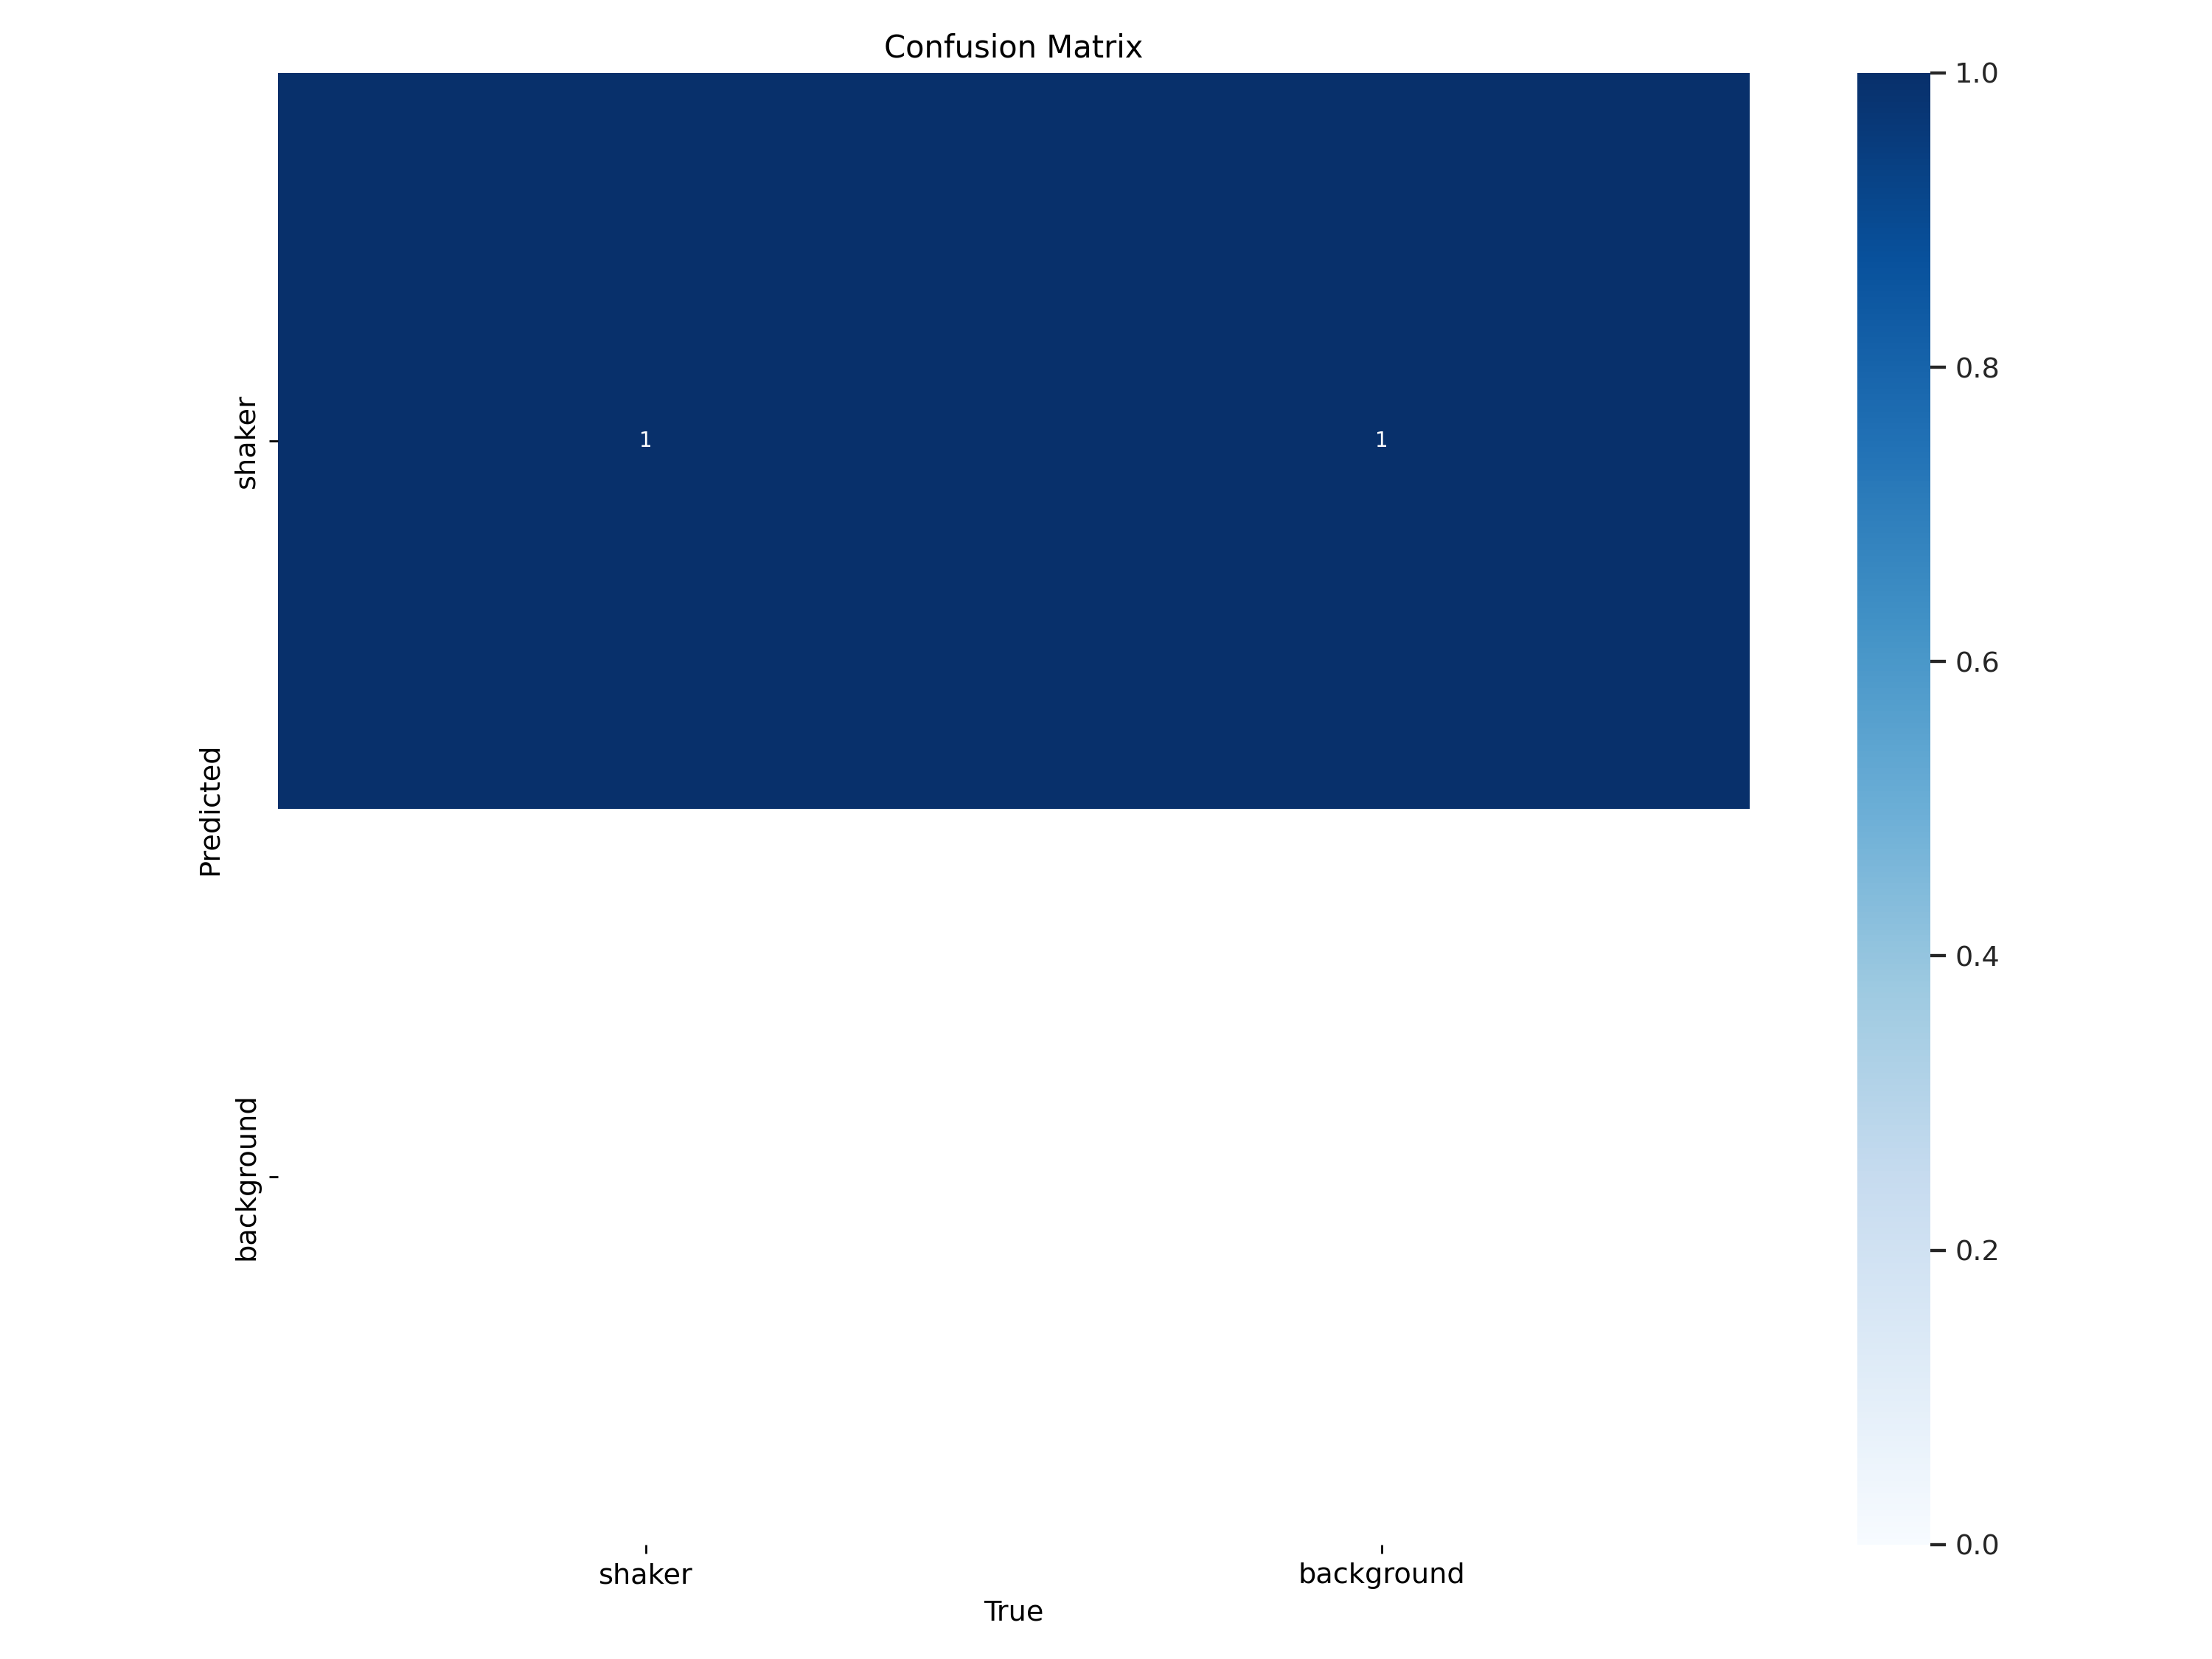

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/confusion_matrix.png', width=600)

/content


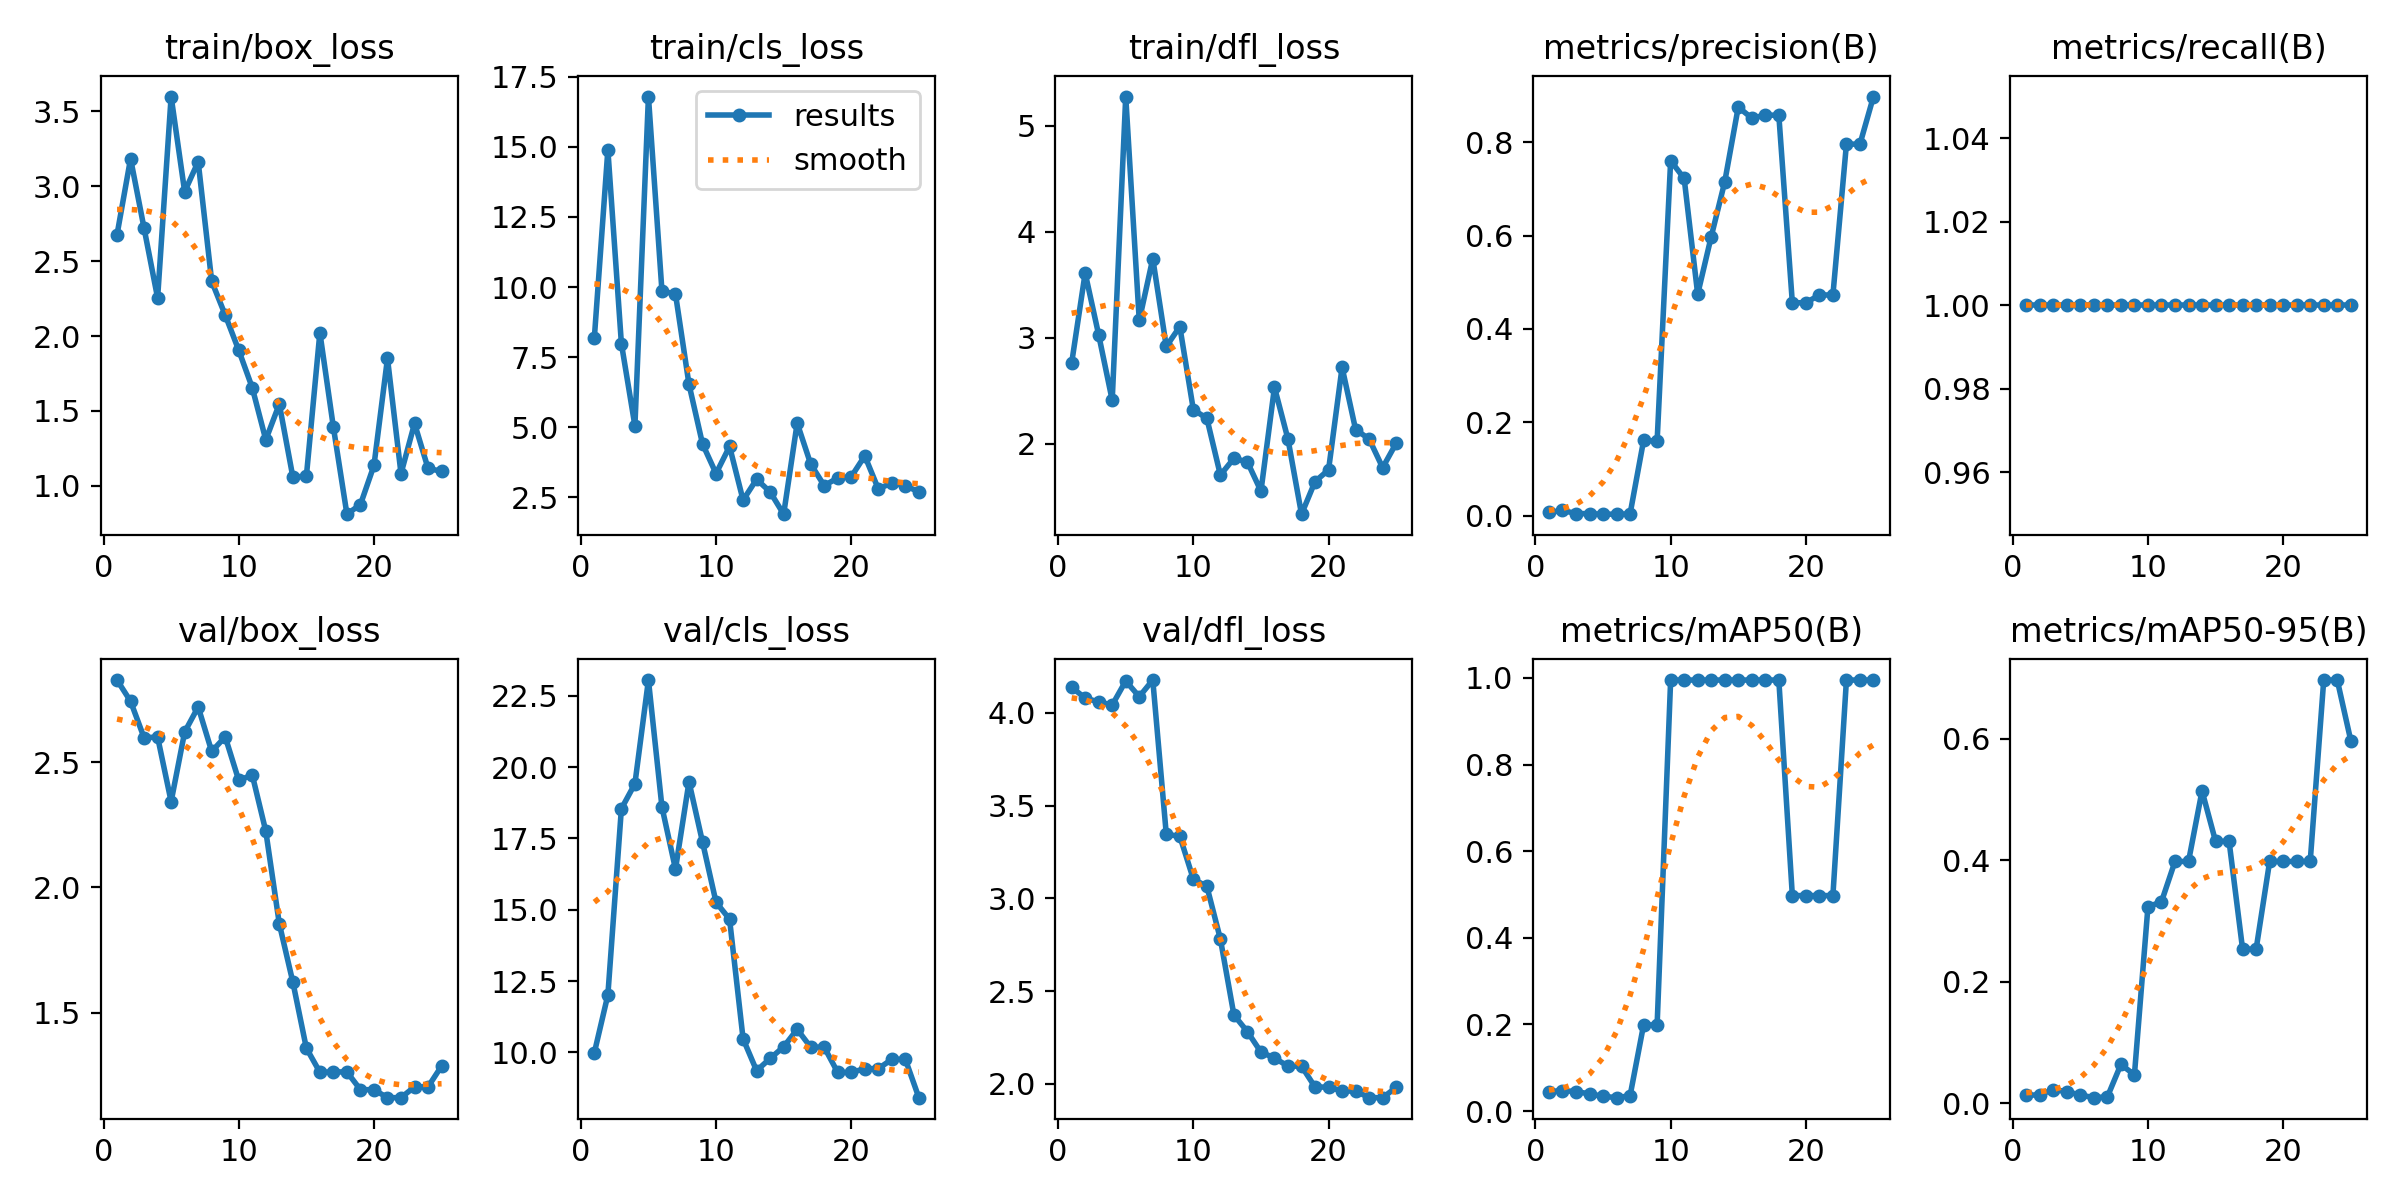

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/results.png', width=600)

/content


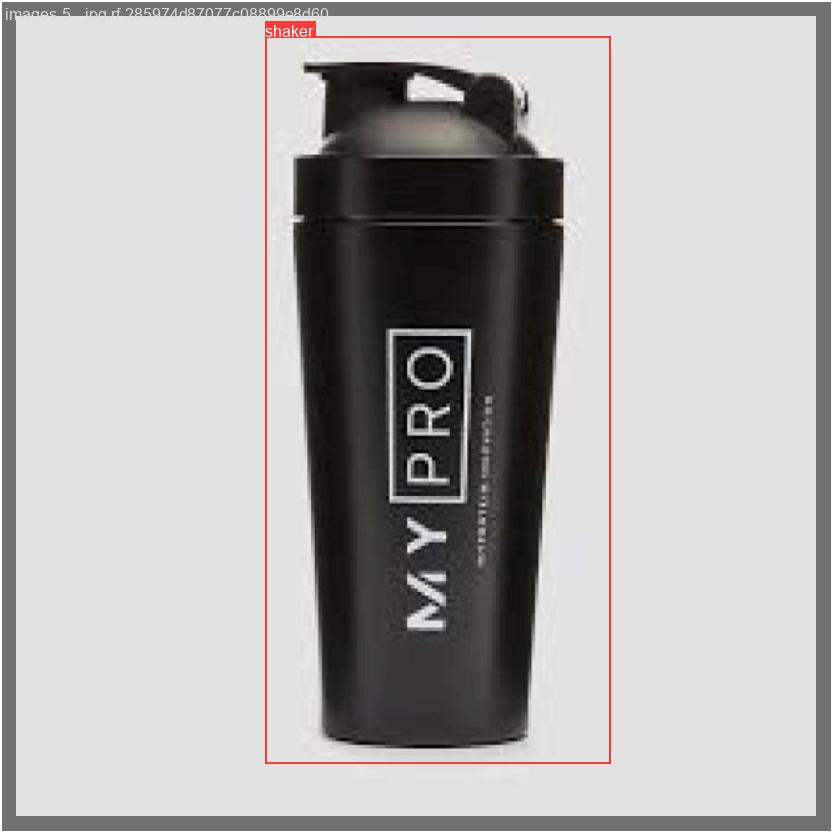

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/val_batch0_labels.jpg', width=600)

/content


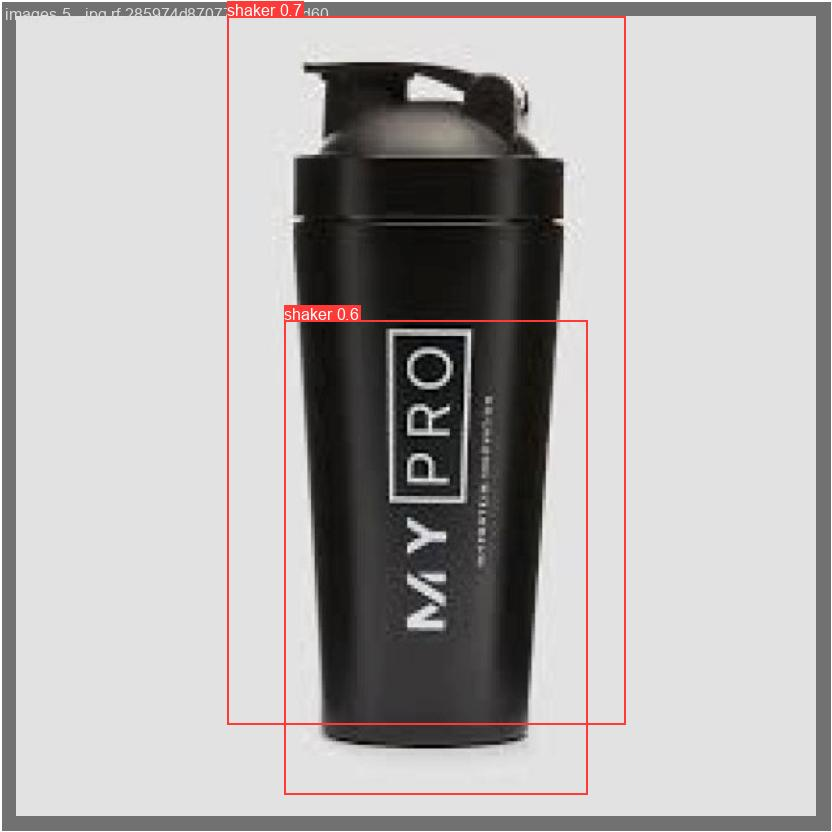

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train8/weights/best.pt data=/content/data.yaml

/content
Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/datasets/Democustombotel-2/valid/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100% 1/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  4.93it/s]
                   all          1          1      0.799          1      0.995      0.697
Speed: 0.5ms preprocess, 71.4ms inference, 0.0ms loss, 87.4ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train8/weights/best.pt conf=0.25 source=/content/datasets/Democustombotel-2/test/images save=True

/content
Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/3 /content/datasets/Democustombotel-2/test/images/images-3-_jpg.rf.a1948b5e365f761506ab57f4d38d5e64.jpg: 800x800 2 shakers, 24.6ms
image 2/3 /content/datasets/Democustombotel-2/test/images/images-4-_jpg.rf.2014cf88498a61aab38f944ed4cb4969.jpg: 800x800 1 shaker, 24.7ms
image 3/3 /content/datasets/Democustombotel-2/test/images/images_jpg.rf.e518bcec598a5431c090c491cd05f13d.jpg: 800x800 3 shakers, 24.6ms
Speed: 8.4ms preprocess, 24.7ms inference, 72.3ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict6


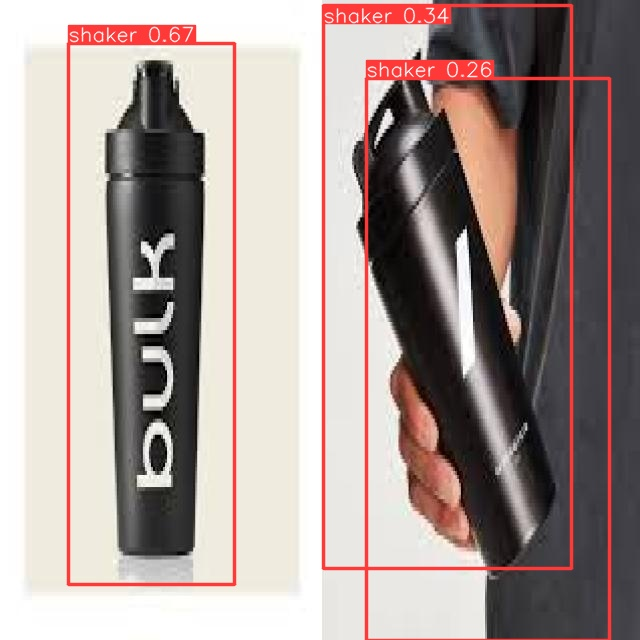

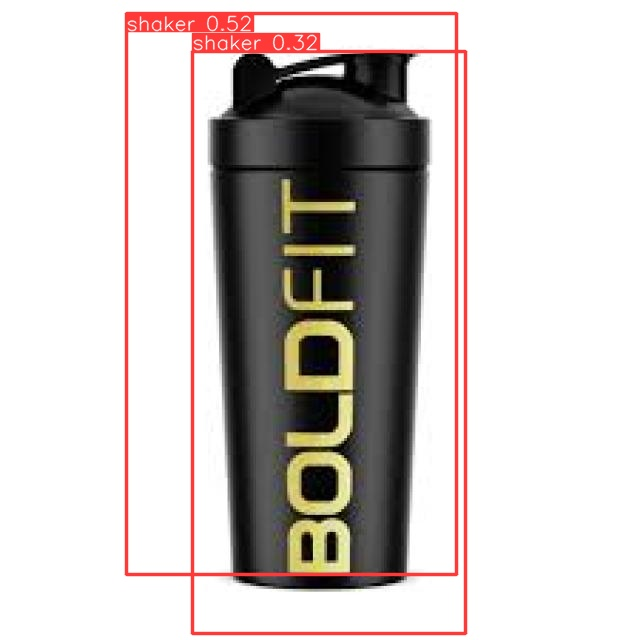

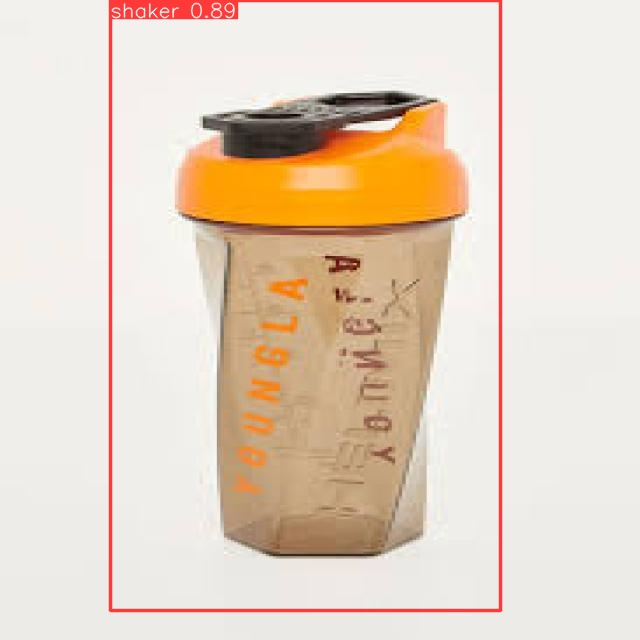

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict6/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [58]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train8/weights/best.pt conf=0.25 source=/content/images.jpg save=True

/content
Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/1 /content/images.jpg: 544x800 4 shakers, 103.9ms
Speed: 2.9ms preprocess, 103.9ms inference, 101.3ms postprocess per image at shape (1, 3, 544, 800)
Results saved to runs/detect/predict7


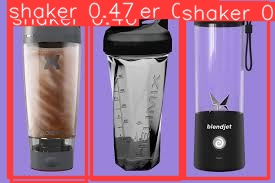

In [60]:
from IPython.display import Image
Image("/content/runs/detect/predict7/images.jpg", width=500, height=500)